## Dependencias

In [3]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.metrics import roc_auc_score,accuracy_score,mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_breast_cancer,load_boston

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

pd.set_option('display.max_columns',500)
pd.set_option('display.float_format',lambda x:'%.2f'%x)
%matplotlib inline

## Cargar datos

In [4]:
data = load_boston()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['PRICE'] = data.target

In [5]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [44]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


## Análisis Exploratorio de Datos

### Ausentes

In [6]:
df.dropna().shape,df.shape

((506, 14), (506, 14))

### Visualización

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'PRICE'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

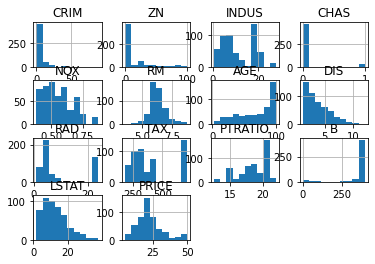

In [46]:
df.hist()

## Variables

In [7]:
var = [v for v in df.columns if v!='PRICE']
tgt = 'PRICE'

In [48]:
len(var),var

(13,
 ['CRIM',
  'ZN',
  'INDUS',
  'CHAS',
  'NOX',
  'RM',
  'AGE',
  'DIS',
  'RAD',
  'TAX',
  'PTRATIO',
  'B',
  'LSTAT'])

In [11]:
tgt

'PRICE'

In [13]:
Nueva=df[var+[tgt]]
Nueva.to_csv("Datos_practica.csv",index=False)

## Preparación de Espacio de predictoras $\mathcal{X}$

In [8]:
X = df[var].copy()

### Escalamiento $\mu=0,\sigma^2=1$

In [50]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

### Transformación $\mathcal{X}(x\in\mathbb{R}^{13})\to\mathcal{X}_s(x\in\mathbb{R}_{\mu=0,\sigma=1}^{13})$

In [51]:
Xs = pd.DataFrame(scaler.transform(X))

In [52]:
Xs.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.42,-0.49,-1.56,-0.27,-1.47,-3.88,-2.34,-1.27,-0.98,-1.31,-2.71,-3.91,-1.53
25%,-0.41,-0.49,-0.87,-0.27,-0.91,-0.57,-0.84,-0.81,-0.64,-0.77,-0.49,0.21,-0.80
50%,-0.39,-0.49,-0.21,-0.27,-0.14,-0.11,0.32,-0.28,-0.52,-0.46,0.27,0.38,-0.18
75%,0.01,0.05,1.02,-0.27,0.60,0.48,0.91,0.66,1.66,1.53,0.81,0.43,0.60
max,9.93,3.80,2.42,3.67,2.73,3.56,1.12,3.96,1.66,1.80,1.64,0.44,3.55



## Preparación de vector de respuesta $\vec{y}$

In [53]:
y = df[[tgt]].copy()

In [54]:
scalery = StandardScaler()
scalery.fit(y)

StandardScaler()

### Transformar $\vec{y},y\in\mathbb{R}\to\vec{y}_s,y\in\mathbb{R}_{\mu=0,\sigma=1}$

In [55]:
ys = pd.DataFrame(scalery.transform(y),columns=[tgt])

In [56]:
ys.describe()

,PRICE
count,506.00
mean,-0.00
std,1.00
min,-1.91
25%,-0.60
50%,-0.15
75%,0.27
max,2.99


## Partición de datos

In [57]:
Xst,Xsv,yst,ysv = train_test_split(Xs,ys)

## Arquitectura del modelo 

In [84]:
help(MLPRegressor)

Help on class MLPRegressor in module sklearn.neural_network._multilayer_perceptron:

class MLPRegressor(sklearn.base.RegressorMixin, BaseMultilayerPerceptron)
 |  MLPRegressor(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron regressor.
 |  
 |  This model optimizes the squared-loss using LBFGS or stochastic gradient
 |  descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity', 'logist

In [58]:
red = MLPRegressor(hidden_layer_sizes=(26,),
                   activation='relu',
                   max_iter = len(df)*2
                  )

### Búsqueda de parámetros $\vec{y}_s = f(\mathcal{X}_s;\theta)$

In [79]:
red.fit(Xst,yst)

/home/oszwaldo/Documentos/Projects/env/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MLPRegressor(hidden_layer_sizes=(26,), max_iter=1012)

In [76]:
red.coefs_[0].shape,red.coefs_[1].shape,

((13, 26), (26, 1))

In [88]:
red.intercepts_

[array([ 0.32185662,  0.28736923, -0.01247074,  0.3276822 , -0.01691382,
         0.3038802 , -0.02872573,  0.25860555,  0.02356511,  0.25378801,
        -0.09704912, -0.13453742,  0.25289145, -0.32415391, -0.24511833,
        -0.10522674, -0.1040616 ,  0.27968988, -0.02915976,  0.31618666,
         0.22730318,  0.08655762,  0.26298214,  0.41664095, -0.11783072,
         0.1987337 ]),
 array([0.11021046])]

## Validación de resultados

In [83]:
red.predict(Xst)

array([-1.65417739,  1.1900669 , -1.00765986,  0.07816708,  0.15644088,
       -0.2471806 , -1.07704381,  0.60107424, -0.24213226, -0.78909065,
        2.96738705,  0.77577838, -0.46044893, -0.28890963,  1.04323761,
       -0.37448502, -0.25183047, -0.81374656,  0.45956069,  0.46342793,
        0.76405813,  0.22597244, -0.0771622 ,  0.02387541, -0.13399496,
       -1.03936148, -0.01784014, -1.71456036,  0.2151099 ,  0.16763683,
       -0.79246377, -0.4534375 ,  0.27643777, -0.16014869, -0.93851161,
       -0.70832867,  0.7199137 , -1.33856522, -0.44095218,  0.66483305,
       -0.79999406,  0.09253903, -1.09922177,  0.30371739,  1.81707005,
       -0.95997922,  0.28679476, -0.3742691 , -0.19439362, -0.28905823,
        0.64553473,  2.23028961,  2.24400323, -0.83861763, -0.24885249,
       -0.94892337, -1.15072679, -1.3481296 , -0.77963624,  0.14987025,
        1.25654321, -1.47336186,  0.31588768,  0.14805395,  2.49212672,
       -1.09207101,  1.69524268, -0.2107521 ,  1.48780134, -0.84

In [62]:
print(mean_absolute_error(y_pred=red.predict(Xst),y_true=yst))
print(mean_absolute_error(y_pred=red.predict(Xsv),y_true=ysv))

0.22171395830798207
0.2786883070711911


In [63]:
Xst['y^']  = red.predict(Xst)
Xst['y']  = yst

Xsv['y^']  = red.predict(Xsv)
Xsv['y']  = ysv

/home/oszwaldo/Documentos/Projects/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/home/oszwaldo/Documentos/Projects/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/home/oszwaldo/Documentos/Projects/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or 

<AxesSubplot:xlabel='y^', ylabel='Density'>

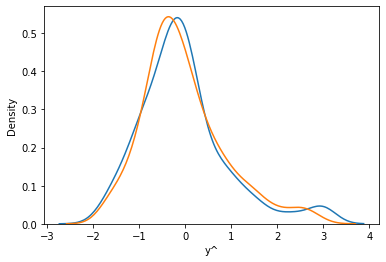

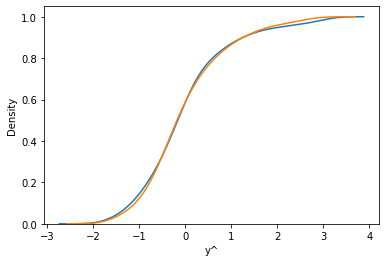

In [64]:
sns.distplot(Xst['y'],hist=False)
sns.distplot(Xst['y^'],hist=False)
plt.figure()
sns.distplot(Xst['y'],hist=False,kde_kws={'cumulative':True})
sns.distplot(Xst['y^'],hist=False,kde_kws={'cumulative':True})

/home/oszwaldo/Documentos/Projects/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/home/oszwaldo/Documentos/Projects/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/home/oszwaldo/Documentos/Projects/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or 

<AxesSubplot:xlabel='y^', ylabel='Density'>

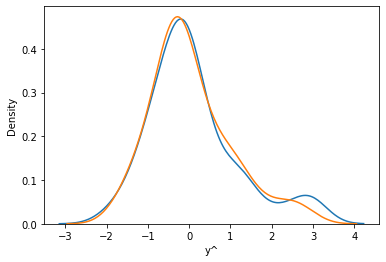

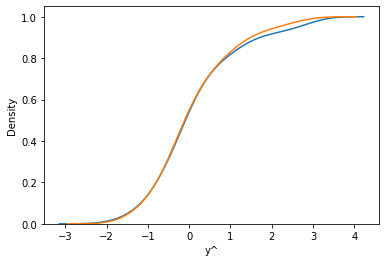

In [65]:
sns.distplot(Xsv['y'],hist=False)
sns.distplot(Xsv['y^'],hist=False)
plt.figure()
sns.distplot(Xsv['y'],hist=False,kde_kws={'cumulative':True})
sns.distplot(Xsv['y^'],hist=False,kde_kws={'cumulative':True})

## Interpretación

In [66]:
yv = pd.DataFrame(scalery.inverse_transform(ysv))

In [67]:
yv['y^'] = scalery.inverse_transform(Xsv['y^'])

<AxesSubplot:>

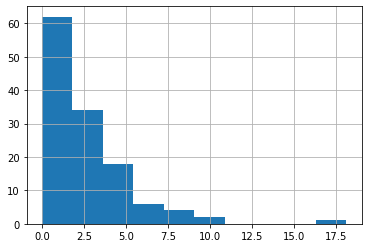

In [68]:
np.abs(yv[0]-yv['y^']).hist()

In [69]:
np.abs(yv[0]-yv['y^']).mean()

2.5605913829041405

In [70]:
yv.sample(10)

,0,y^
101,20.10,17.95
50,16.50,21.89
11,33.40,28.55
124,26.50,23.54
38,41.70,45.33
99,18.50,15.14
10,13.50,14.02
113,20.60,22.42
69,43.50,42.37
1,23.70,20.13
